<a href="https://colab.research.google.com/github/vitoraugusto1993/ml-projects/blob/main/Web%20Scrapping/Artilheiros%20do%20Brasileir%C3%A3o%202025/Web_scrapping_lista_de_artilheiros_do_Brasileir%C3%A3o_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

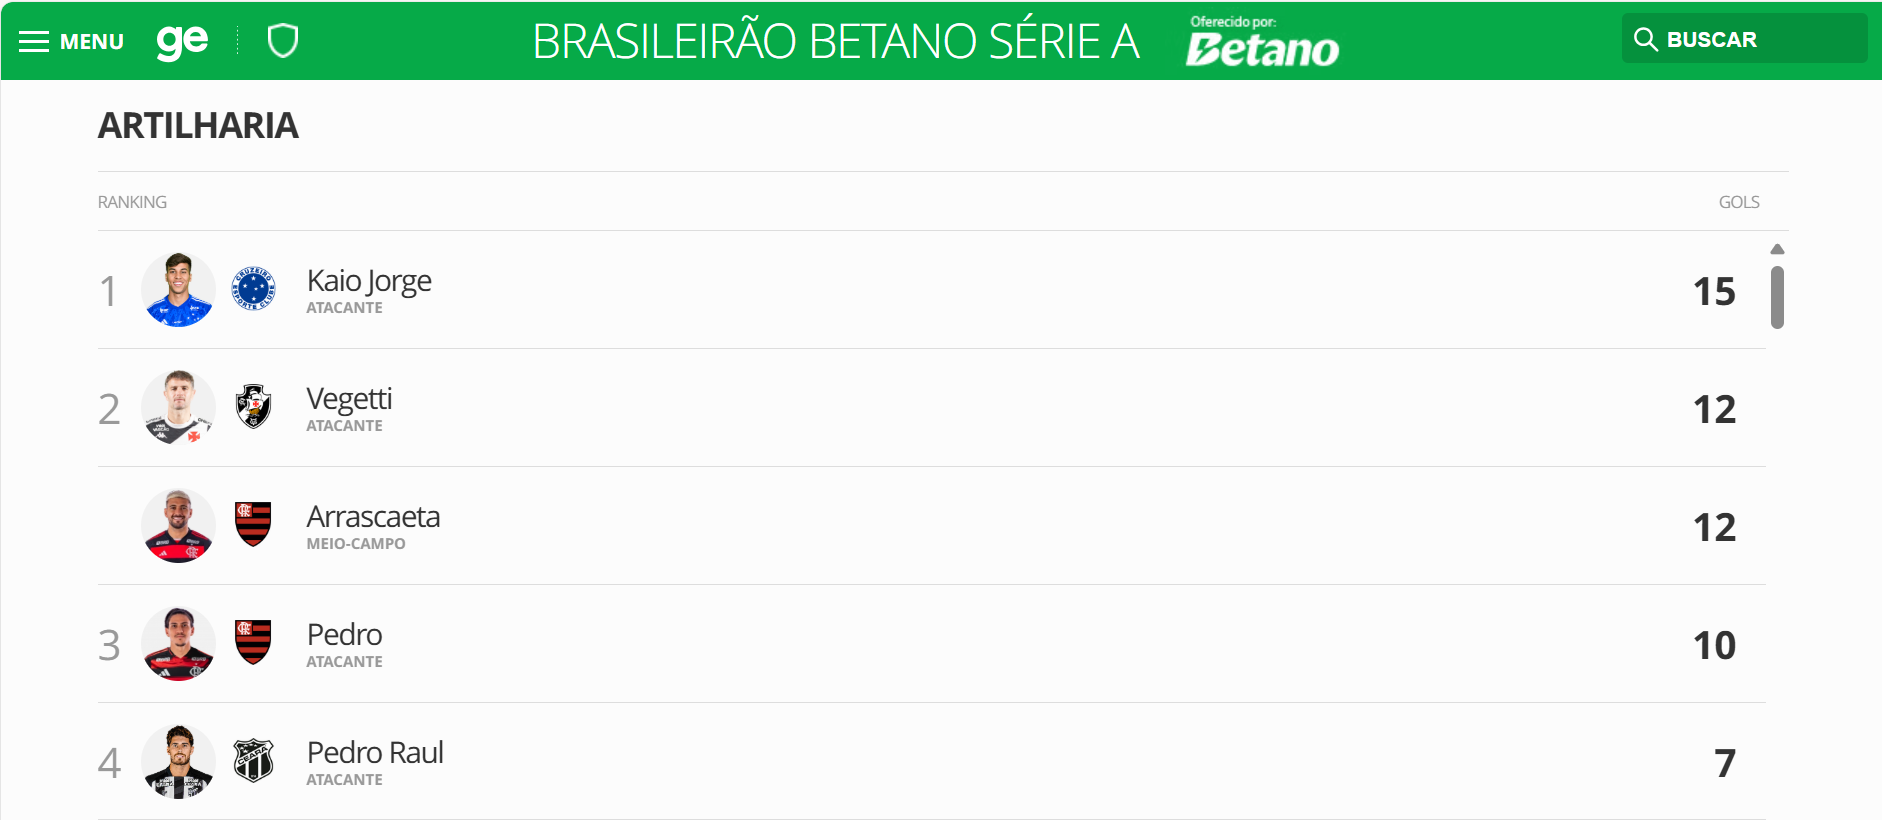

In [5]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [8]:
url = 'https://ge.globo.com/futebol/brasileirao-serie-a/'  # Replace with the URL of the website you want to scrape
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    print('Request successful!')
else:
    print('Failed to retrieve the webpage')

Request successful!


In [9]:
soup = BeautifulSoup(response.content, 'html.parser')

# Print the title of the webpage to verify
print(soup.title.text)

Tabela e Jogos do Brasileirão Série A 2025 | ge | brasileirão série a | ge


In [10]:
# Find the table containing the data
artilharia = soup.find('section', {'class': 'artilharia-wrapper'})

In [82]:
#Iterate over all players in the ranking
ranking = artilharia.find_all('div', {'class': 'ranking-item-wrapper'})

data = []
rank_ant = '1'
for player in ranking:
    rank = str(player.find('div', {'class': 'ranking-item'}).text).strip()
    if rank == '':
        rank = rank_ant
    rank_ant = rank
    nome = player.find('div', {'class': 'jogador-nome'})
    time = player.find('div', {'class': 'jogador-escudo'})
    nome_time = time.find('img')['alt']
    pos = player.find('div', {'class': 'jogador-posicao'})
    gols = str(player.find('div', {'class': 'jogador-gols'}).text).strip()
    data.append([rank, nome.text, nome_time, pos.text, gols])


In [84]:
# Create a dataframe
df = pd.DataFrame(data, columns=['Rank', 'Jogador', 'Time', 'Posição', 'Gols'])

In [85]:
df

,Rank,Jogador,Time,Posição,Gols
0,1,Kaio Jorge,Cruzeiro,Atacante,15
1,2,Vegetti,Vasco,Atacante,12
2,2,Arrascaeta,Flamengo,Meio-campo,12
3,3,Pedro,Flamengo,Atacante,10
4,4,Pedro Raul,Ceará,Atacante,7
5,4,Reinaldo,Mirassol,Lateral-esquerdo,7
6,4,Renato Kayzer,Vitória,Atacante,7
7,5,Isidro Pitta,Bragantino,Atacante,6
8,5,Flaco López,Palmeiras,Atacante,6
9,5,Braithwaite,Grêmio,Atacante,6


In [86]:
# Save the DataFrame to a CSV file
df.to_csv('top50_artilheiros_do_brasileirão_2025.csv', index=False)